# Reshaping and combining arrays

In addition to the mathematical operations described previously, images (arrays) can also change by modifying their shape or by combining them with other images.

In [1]:
import skimage
import numpy as np
from microfilm.microplot import microshow

image_nd = skimage.io.imread('../data/coli_nucl_ori_ter_raw.tif')

## Reshaping arrays

Sometimes it is necessary to reshape an array e.g. to make it possible to pass it to a given function. There are several different types of reshaping.

### Moving dimensions

Sometimes a function will make assumptions about the meaning of each dimension of an array. For example for visualization, it might be that the channels dimension always has to be in last position. In such cases, we can for example use the ```np.moveaxis``` function. Here we will move the channel dimension (third position) into last position:

In [2]:
image_nd.shape

(30, 220, 169, 3)

In [3]:
image_moved = np.moveaxis(image_nd, source=0, destination=3)
image_moved.shape

(220, 169, 3, 30)

### Reshaping an array

We can also entirely reshape an array. The only limitations is that the number of pixels corresponding to the new shape should be the same as the original one. Let's just consider a part of the image above:

In [4]:
image_part = image_nd[0,:,:,:]
image_part.shape

(220, 169, 3)

We can now for example combine the three channels into a single image. For this we can for example use 220 pixels times 3x169 pixels. It can be tricky to obtain the desired result and often it's easier to just combine parts of the array (see next part). For example here we get a scrambled image:

In [5]:
image_reshaped = np.reshape(image_part, (220, 3*169))

In [6]:
image_reshaped.shape

(220, 507)

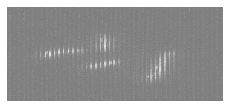

In [7]:
microshow(image_reshaped, limits=[0,200]);

And we need to specify in which order the dimensions should be used:

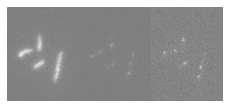

In [8]:
image_reshaped = np.reshape(image_part, (220, 3*169), order='F')
microshow(image_reshaped, limits=[0,200]);

### Flatten an image

We could of course reshape our image so that its just one long list of pixels. However for that we would have to compute the total number of pixels e.g. 

In [9]:
np.reshape(image_part, (220*3*169)).shape

(111540,)

Instead of this, we can directly used the function ```np.ravel```, which  "flattens" the image:

In [10]:
np.ravel(image_part).shape

(111540,)

This is useful in case we are interested e.g. in using pixels for statistical plots. If we pass for example a 2D array to ```plt.hist```, it will assume that we have many datasets (one per row) and make an overly complicated histogram. In that case we'd use:

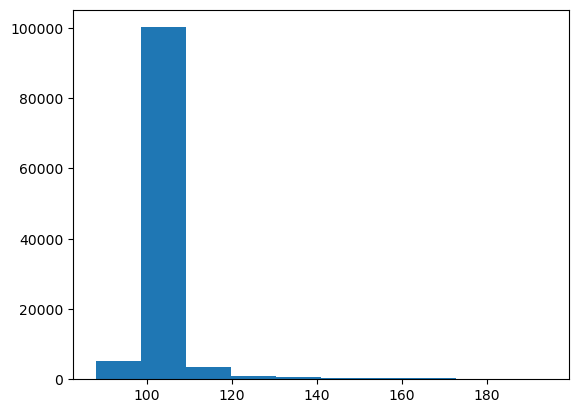

In [11]:
import matplotlib.pyplot as plt

plt.hist(np.ravel(image_part));

## Combining arrays

Sometimes it is also necessary to combined multiple images either into a single plane or into a stack. 

### Stacks

For example, imagine that a time-lapse is stored as a series of files imported separately: in order to display it properly in napari, you would need to reassemble it.

Let's split our data set into a few single images:

In [12]:
image_nd.shape

(30, 220, 169, 3)

In [13]:
im_t0 = image_nd[0, : ,:, :]
im_t1 = image_nd[1, : ,:, :]

Now each image has the shape:

In [14]:
im_t0.shape

(220, 169, 3)

Now we can reassemble this dataset e.g. using the ```np.stack``` function:

In [15]:
im_stack = np.stack([im_t0, im_t1])

im_stack.shape

(2, 220, 169, 3)

By default the images are stacked along a new axis added at the beginning of the stack as seen above. We can also specify where we want the new dimension e.g. at the end:

In [16]:
im_stack = np.stack([im_t0, im_t1], axis = 3)

im_stack.shape

(220, 169, 3, 2)

## Concatenation

Alternatively to a stack, we can also combine multiple images into a single image. Again here, we can choose along which dimension this should happen. Note that of course the images should have compatible dimensions:

In [17]:
im_concat1 = np.concatenate([im_t0, im_t1],axis=0)

im_concat2 = np.concatenate([im_t0, im_t1],axis=1)

In [18]:
im_t0.shape

(220, 169, 3)

In [19]:
im_concat1.shape

(440, 169, 3)

In [20]:
im_concat2.shape

(220, 338, 3)

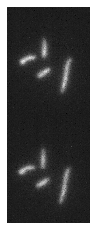

In [21]:
microshow(im_concat1[:,:,0]);

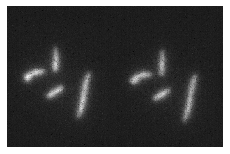

In [22]:
microshow(im_concat2[:,:,0]);

## Exercise

1. Import the image ```cellatlas/19838_1252_F8_1.tiff```
2. Move the channel dimensions in first position
3. Extract the first and second channel and concatenate the two images vertically and then horizontally.